# Laboratorio 6
## Alexander Espinosa Montoya

### 2. Generacion de Senales 
Generar un tren de pulsos de periodo N y amplitud A donde se visualicen por lo menos 5 periodos de la senal.(N=50 + ultimo numero de cedula, A= ultimo numero de cedula+1). Grafique el resultado.

N = 50, A = 1

In [1]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la señal
import matplotlib.pyplot as plt # Libreria para graficar
import numpy as np

250
50


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/3026643750.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Tren de pulsos",FontSize=15) #titulo


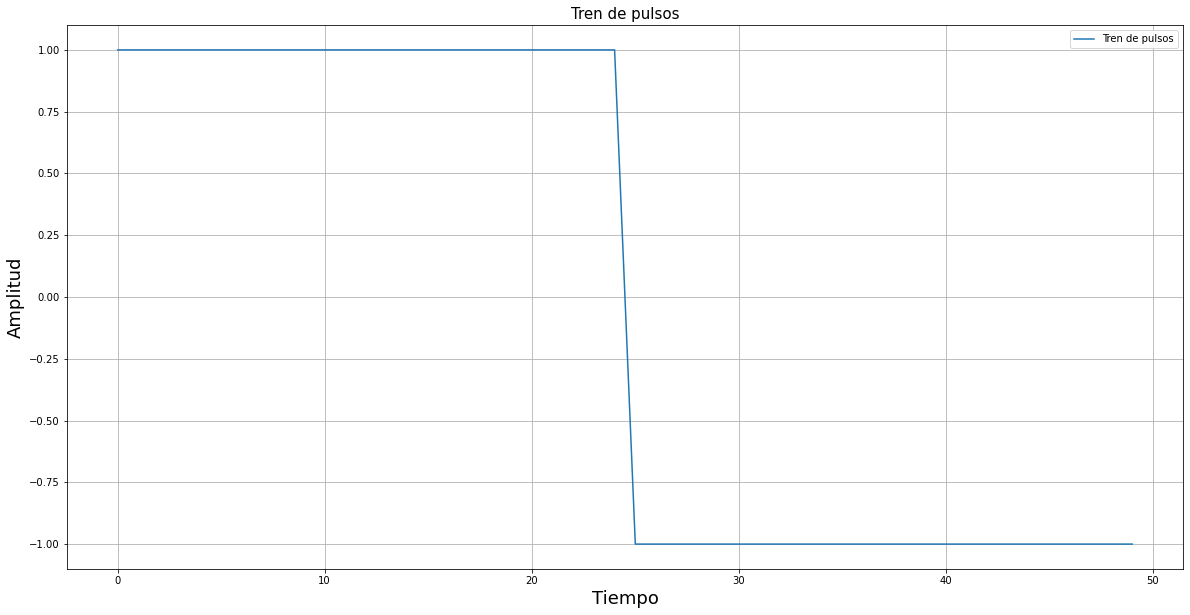

In [2]:
N = 50
A = 1
N_per = 5
signal = np.hstack((np.ones(int(N/2)),-1*np.ones(int(N/2))))
Tren = np.tile(signal, N_per)
print(len(Tren))
print(len(signal))

t = np.arange(0,50,1)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,signal, label="Tren de pulsos") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Tren de pulsos",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/3216191657.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Tren de pulsos",FontSize=15) #titulo


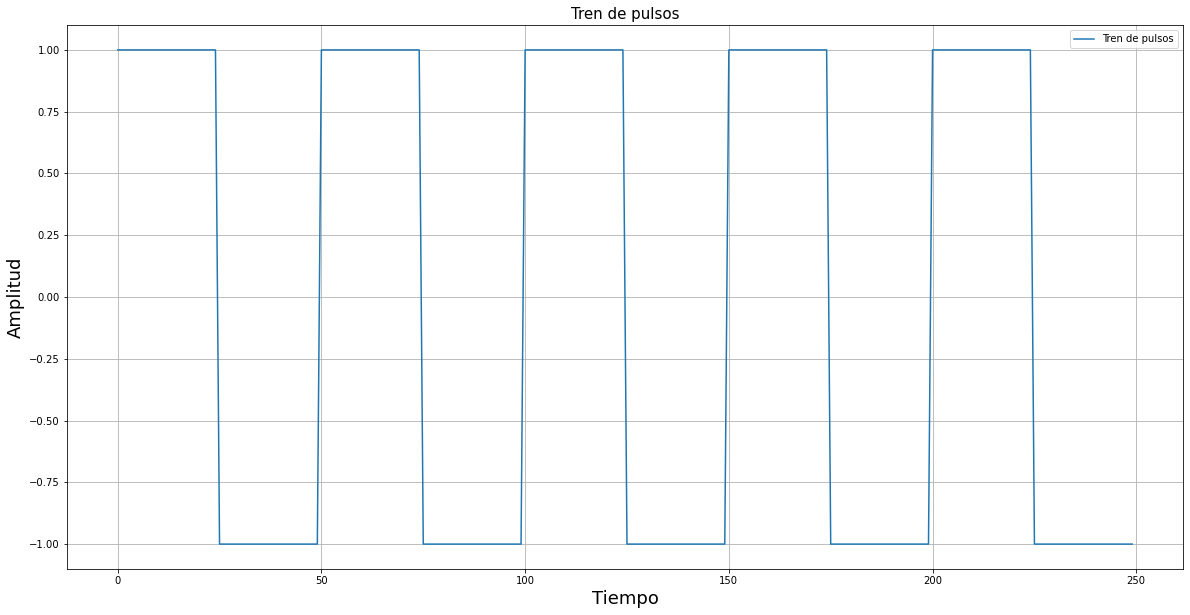

In [3]:

t = np.arange(0,5*N,1)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,Tren, label="Tren de pulsos") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Tren de pulsos",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

### 3. Coeficientes de la serie de Fourier

1. Cree una funcion que calcule los coeficientes de la serie de Fourier para una senal x[n] cualquiera.
Tip: Puede usar el siguiente codigo como base.
Tip2: Recuerde que el espectro es simetrico y tiene coeficientes positivos y negativos.

In [4]:
def fourier_coefs(x_n,Ncoef):
    # x_n: senal definida en un periodo
    # Ncoef: numero de componentes a hallar
    N=len(x_n)
    cn=np.empty(Ncoef,'complex')
    n=np.arange(0,len(x_n))
    for k in np.arange(int(Ncoef/2)+1):
        cn[k]= (1/N)*sum(x_n*np.exp((-1j*2*np.pi*k*n)/N))
        cn[-k]= (1/N)*sum(x_n*np.exp((-1j*2*np.pi*k*n)/N))
    return cn

2. Calcule la potencia de la senal a partir de los coeficientes encontrados y compruebe el teorema de Parseval.
Hagalo para 9, 13 y 25 coeficientes. ¿Obtuvo el resultado esperado?. Explique.

In [5]:
#Teorema de Parseval

cn_9 = fourier_coefs(signal,9)
Pt = (1/N)*sum((abs(signal))**2)
Pf = sum((abs(cn_9))**2)
print("Potencia en el dominio de la frecuencia = ",Pf,"Potencia en el tiempo = ", Pt )

cn_13 = fourier_coefs(signal,13)
Pt = (1/N)*sum((abs(signal))**2)
Pf = sum((abs(cn_13))**2)
print("Potencia en el dominio de la frecuencia = ",Pf,"Potencia en el tiempo = ", Pt )

cn_25 = fourier_coefs(signal,25)
Pt = (1/N)*sum((abs(signal))**2)
Pf = sum((abs(cn_25))**2)
print("Potencia en el dominio de la frecuencia = ",Pf,"Potencia en el tiempo = ", Pt )

Potencia en el dominio de la frecuencia =  0.9027745423735605 Potencia en el tiempo =  1.0
Potencia en el dominio de la frecuencia =  0.9362853774295592 Potencia en el tiempo =  1.0
Potencia en el dominio de la frecuencia =  0.9729581614686762 Potencia en el tiempo =  1.0


¿Obtuvo el resultado esperado?. Explique
R: Si se obtubo lo esperado, ya que para alcanzar el 100% de la potencia requiere de una gran cantidad de componentes cn

3. A partir de los coeficientes obtenidos, grafique el espectro de potencia de la senal. ¿Que puede concluir?
Nota: Recuerde que el espectro es simetrico centrado en cero.

[-4 -3 -2 -1  0  1  2  3  4]


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/1043503156.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Espectro de potencia",FontSize=15) #titulo


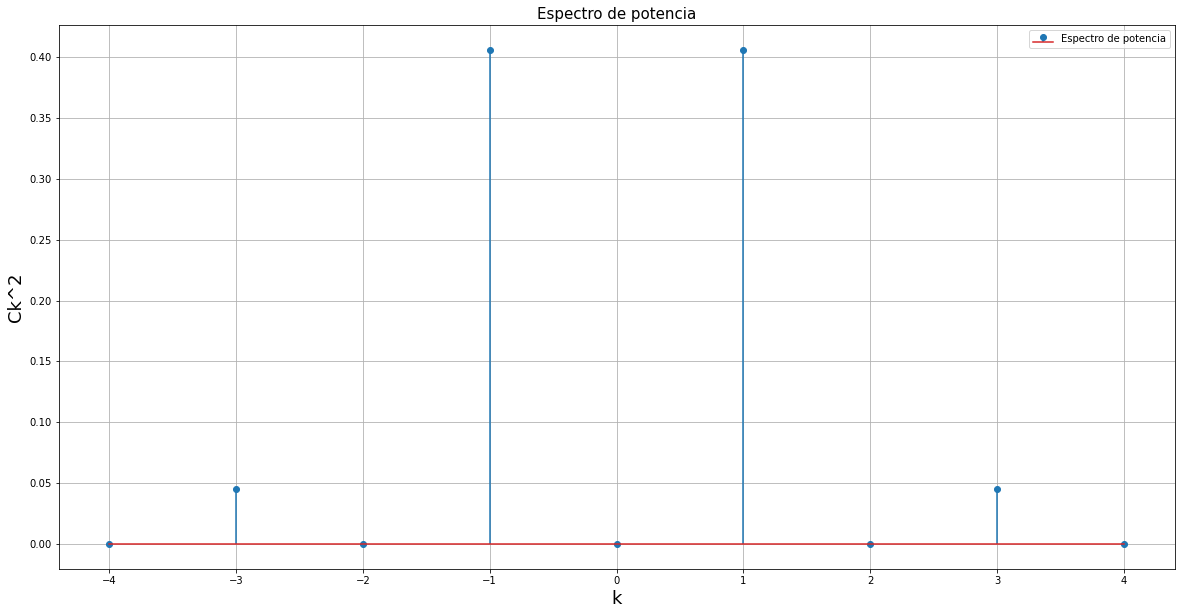

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6]


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/1043503156.py:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Espectro de potencia",FontSize=15) #titulo


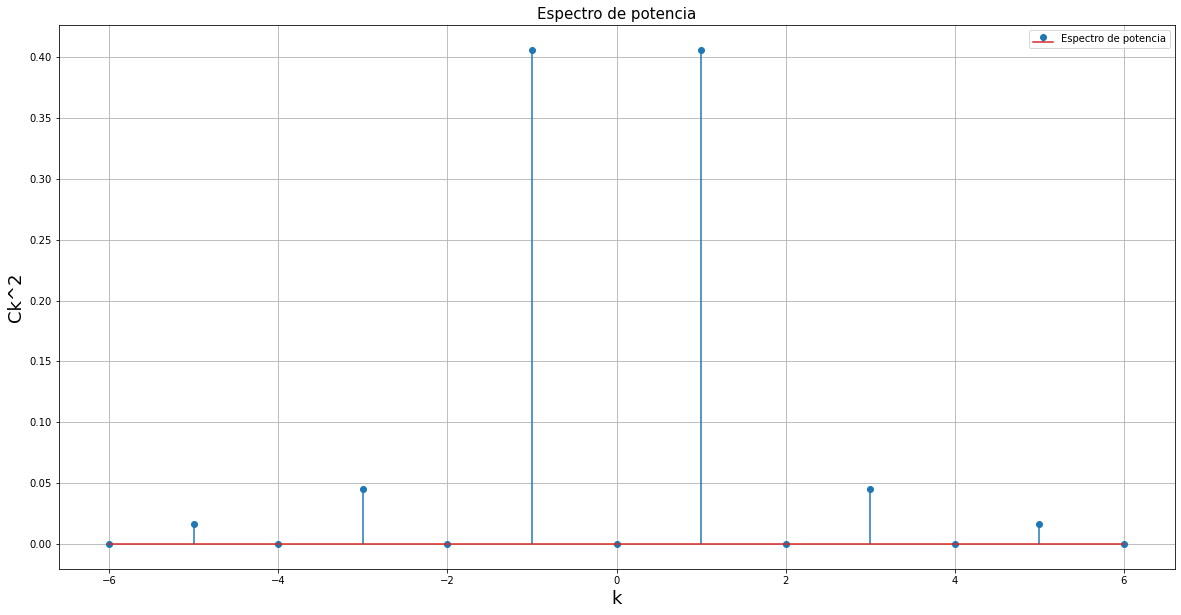

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/1043503156.py:35: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Espectro de potencia",FontSize=15) #titulo


[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


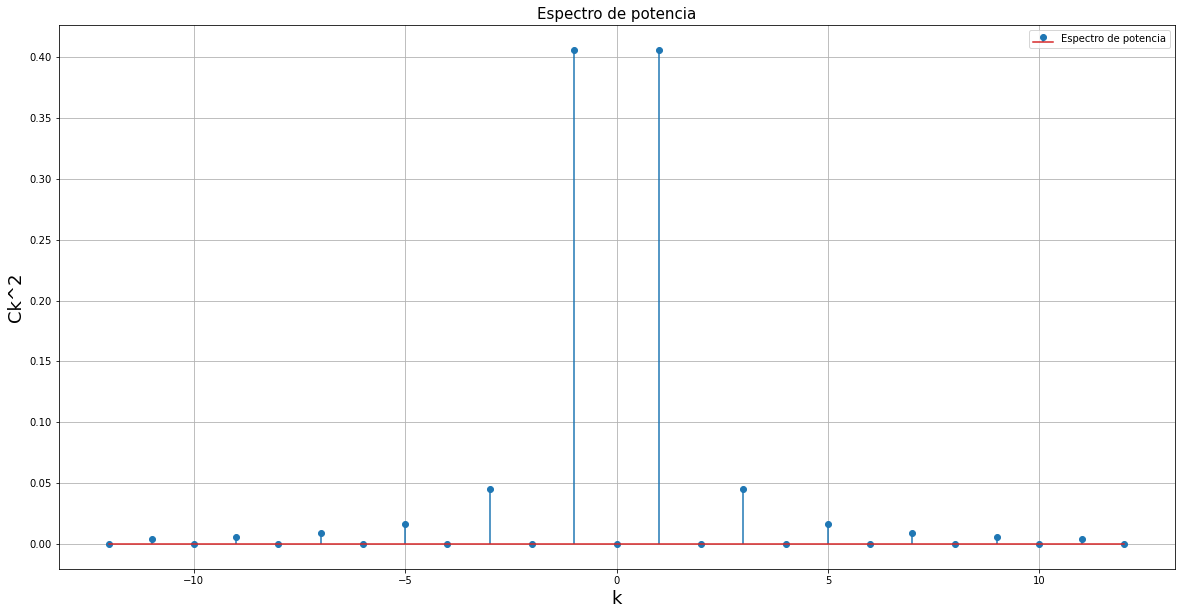

In [6]:
#Para 9
P9 = (abs(cn_9))**2
K_9 = np.arange(-int(9/2),int(9/2)+1)
print(K_9)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.stem(K_9, np.roll(P9,int(9/2)), label="Espectro de potencia") #señal x y  t
plt.xlabel('k',fontsize=18) #label x
plt.ylabel('Ck^2',fontsize= 18) #label y
plt.title("Espectro de potencia",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

#Para 13
P13 = (abs(cn_13))**2
K_13 = np.arange(-int(13/2),int(13/2)+1)
print(K_13)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.stem(K_13, np.roll(P13,int(13/2)), label="Espectro de potencia") #señal x y  t
plt.xlabel('k',fontsize=18) #label x
plt.ylabel('Ck^2',fontsize= 18) #label y
plt.title("Espectro de potencia",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

#Para 25
P25 = (abs(cn_25))**2
K_25 = np.arange(-int(25/2),int(25/2)+1)
print(K_25)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.stem(K_25, np.roll(P25,int(25/2)), label="Espectro de potencia") #señal x y  t
plt.xlabel('k',fontsize=18) #label x
plt.ylabel('Ck^2',fontsize= 18) #label y
plt.title("Espectro de potencia",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

¿Que puede concluir?
R: Se puede ver que mas del 90% de la potencia se encuentra en los primeros 9 coeficientes

### 4. Sıntesis de senales

1. Escriba una funcion que permita sintetizar la senal x(t) a partir de los coeficientes obtenidos.

Tip: Recuerde que debe usar tanto los coeficientes de frecuencia positiva y negativa para la reconstruccion de
la senal y poder recuperar la potencia completa.

In [7]:
def synthezise_fourier(ck,N,NumP):
    #ck: Coeficientes de la serie
    #N: Periodo de la senal
    #Nump: Numero de periodos a graficar
    n=np.arange(0,N*NumP,1)
    senalF=np.zeros(N*NumP,'complex')
    for k in np.arange(0,(len(ck)//2)+1):
        senalF+= ck[k]*np.exp((1j*2*np.pi*k*n)/N)
        senalF+= ck[-k]*np.exp((1j*2*np.pi*k*n)/N)
        if k==0:
            senalF=senalF/2
    return senalF

2. ¿Por que se divide por 2 cuando k=0?
R: en K = 0, solo hay una sola componente, su nivel dc por eso se divide en 2 de la sumatoria

3. Grafique la senal usando 3, 12 y (N/2)-1 coeficientes. ¿Que puede observar?. Escriba sus conclusiones.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/3105809452.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal recuperada",FontSize=15) #titulo


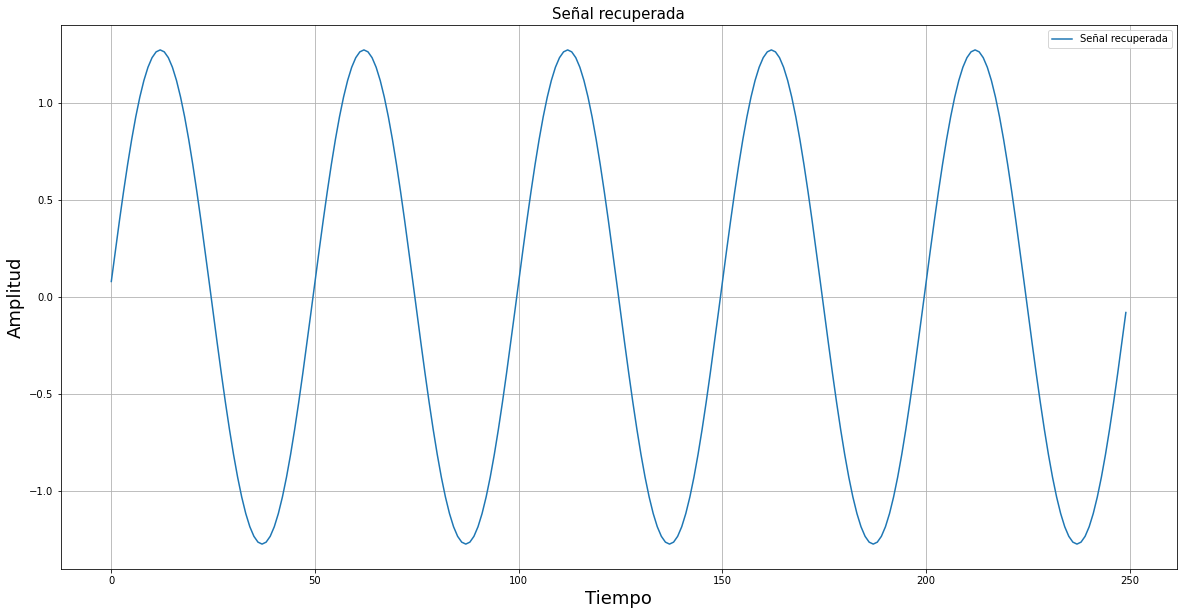

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/3105809452.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal recuperada",FontSize=15) #titulo


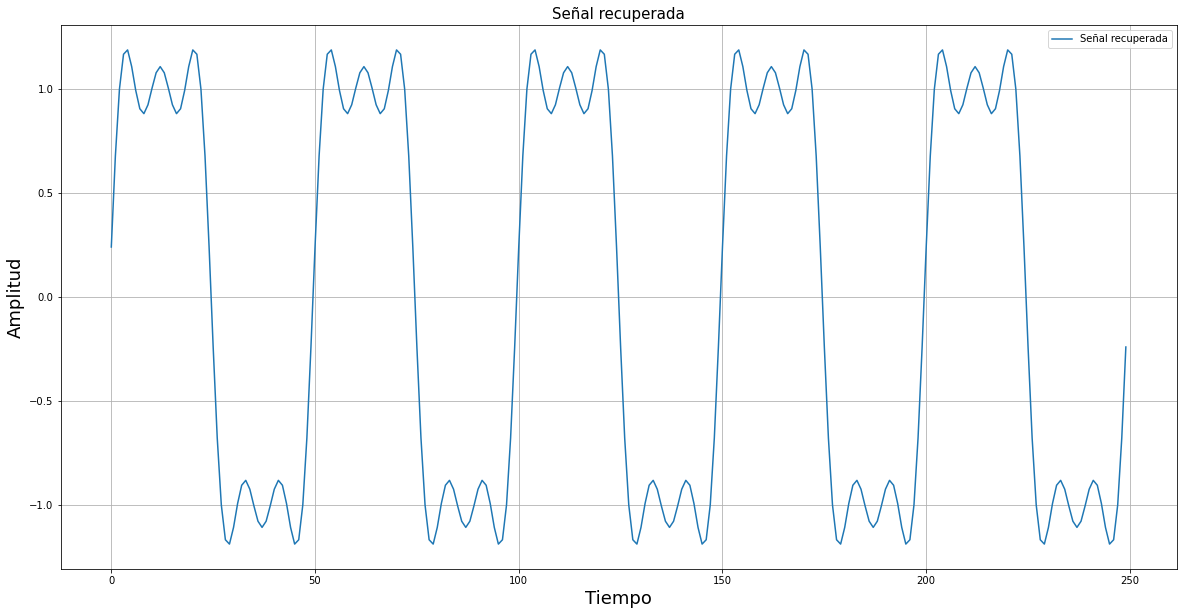

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_21884/3105809452.py:39: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Señal recuperada",FontSize=15) #titulo


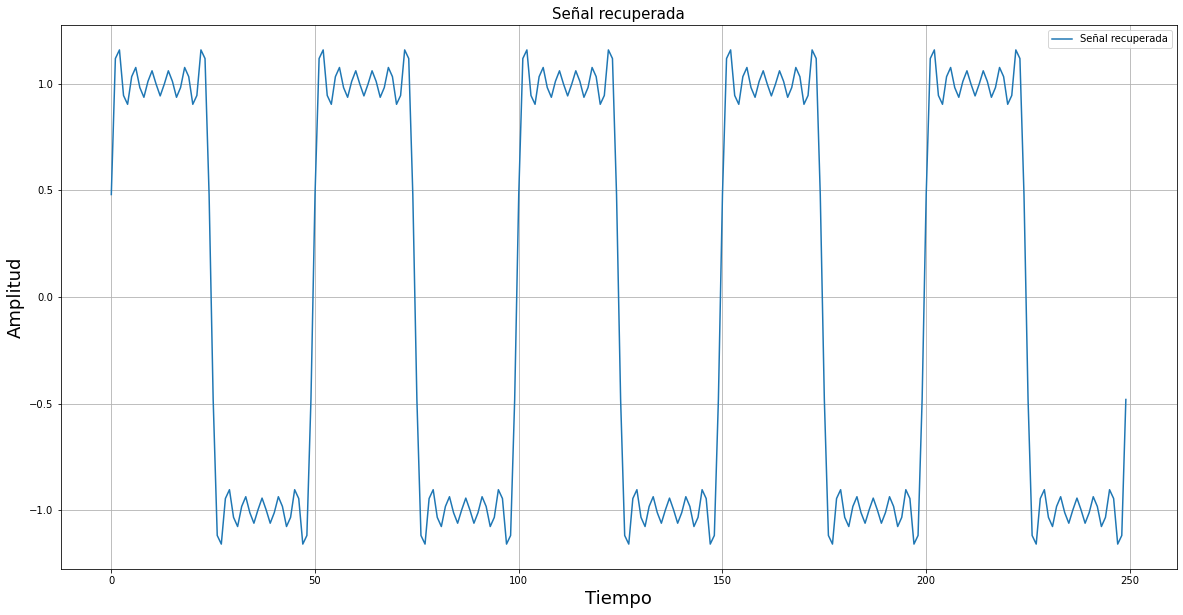

In [8]:
#Usando 3
cn_3 = fourier_coefs(signal,3)
Señal_3 = synthezise_fourier(cn_3,N,5)

t = np.arange(0,5*N,1)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,Señal_3, label="Señal recuperada") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal recuperada",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

#Usando 12
cn_12 = fourier_coefs(signal,12)
Señal_12 = synthezise_fourier(cn_12,N,5)

t = np.arange(0,5*N,1)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,Señal_12, label="Señal recuperada") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal recuperada",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar


#Usando (N/2)-1 = (50/2)-1 = 24
cn_24 = fourier_coefs(signal,24)
Señal_24 = synthezise_fourier(cn_24,N,5)

t = np.arange(0,5*N,1)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(t,Señal_24, label="Señal recuperada") #señal x y  t
plt.xlabel('Tiempo',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Señal recuperada",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

¿Que puede observar?
R: vemos que entre mas coeficientes tengamos, al recuperar la señal, esta sera mas cercana a la real, se necesitarian infinitos coeficientes para ser recuperada completamente

### 5. Transformada de Fourier
Al igual que en el caso de tiempo continuo, las series de Fourier se aplican para senales periodicas y la transformada
de Fourier se aplica para senales no-periodicas (senales de energıa finita).

Para calcular la transformada de Fourier de una senal de tiempo discreto se hace uso de la siguiente expresion,
siendo ω un vectr que determina la frecuencia normalizada:


1. Escriba una funcion que permita calcular la transformada de Fourier de una senal de tiempo discreto x[n].

In [105]:
def fourierTransform(x_n):
    fs=1000
    w=np.arange(-np.pi,np.pi,1/fs)
    senalF=np.zeros(len(w),'complex')
    for k in np.arange(0,len(x_n)):
        senalF+= x_n[k]*np.exp(-1j*w*k)
    return senalF/fs

2. Calcule y grafique la transformada de Fourier de la senal cuadrada que utilizo para generar el tren de pulsos

6284


C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_14552/1605856931.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Trasformada de furier",FontSize=15) #titulo


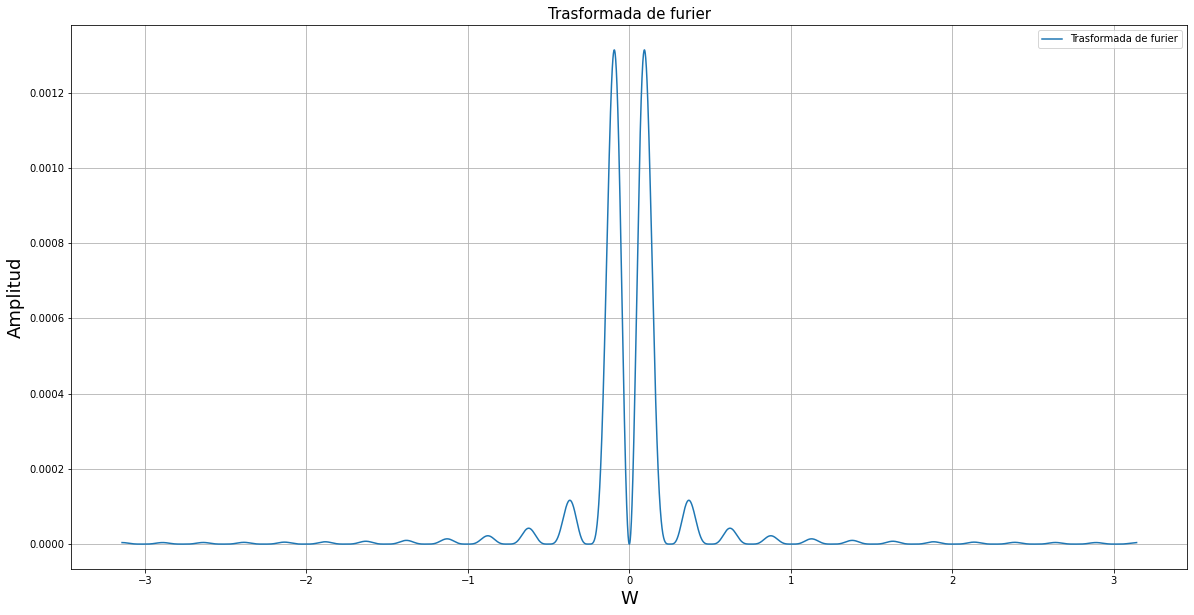

In [109]:
Trasformada_signal = fourierTransform(signal)

w=np.arange(-np.pi,np.pi,1/fs)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(w,abs(Trasformada_signal)**2, label="Trasformada de furier") #señal x y  t
plt.xlabel('W',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Trasformada de furier",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

3. En una misma figura compare el espectro de la transformada de Fourier con el espectro de la serie de Fourier.
¿Encuentra alguna similitud? ¿a que cree que se debe esto? Explique

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_14552/3235394194.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Trasformada de furier",FontSize=15) #titulo


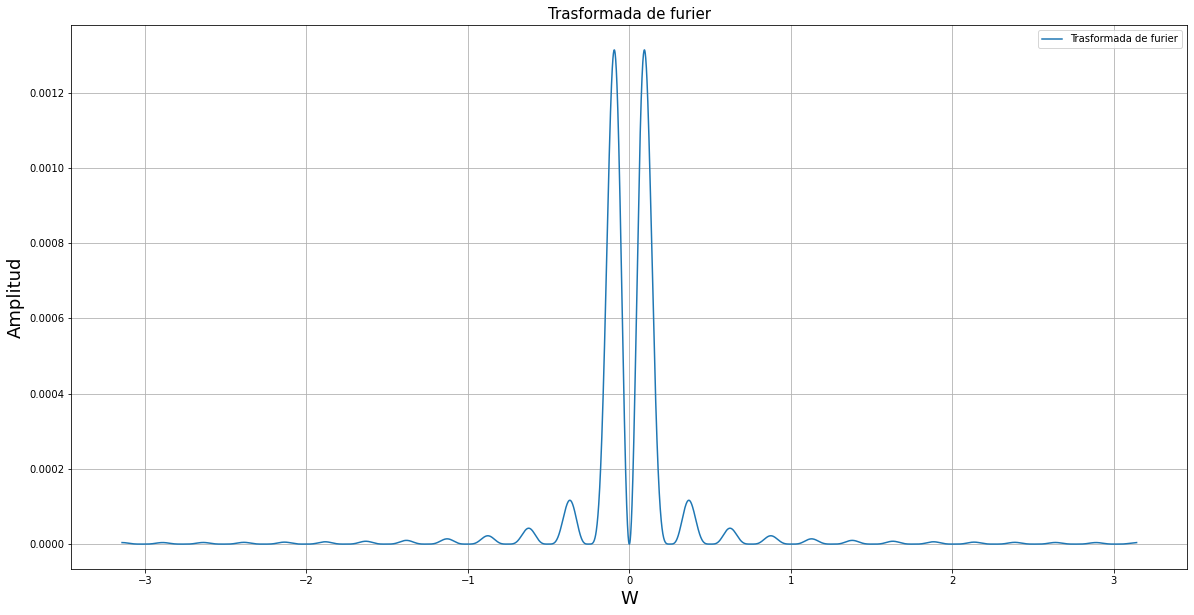

C:\Users\ALEX_PC\AppData\Local\Temp/ipykernel_14552/3235394194.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Espectro de potencia",FontSize=15) #titulo


[-3.14159265 -2.87979327 -2.61799388 -2.35619449 -2.0943951  -1.83259571
 -1.57079633 -1.30899694 -1.04719755 -0.78539816 -0.52359878 -0.26179939
  0.          0.26179939  0.52359878  0.78539816  1.04719755  1.30899694
  1.57079633  1.83259571  2.0943951   2.35619449  2.61799388  2.87979327
  3.14159265]


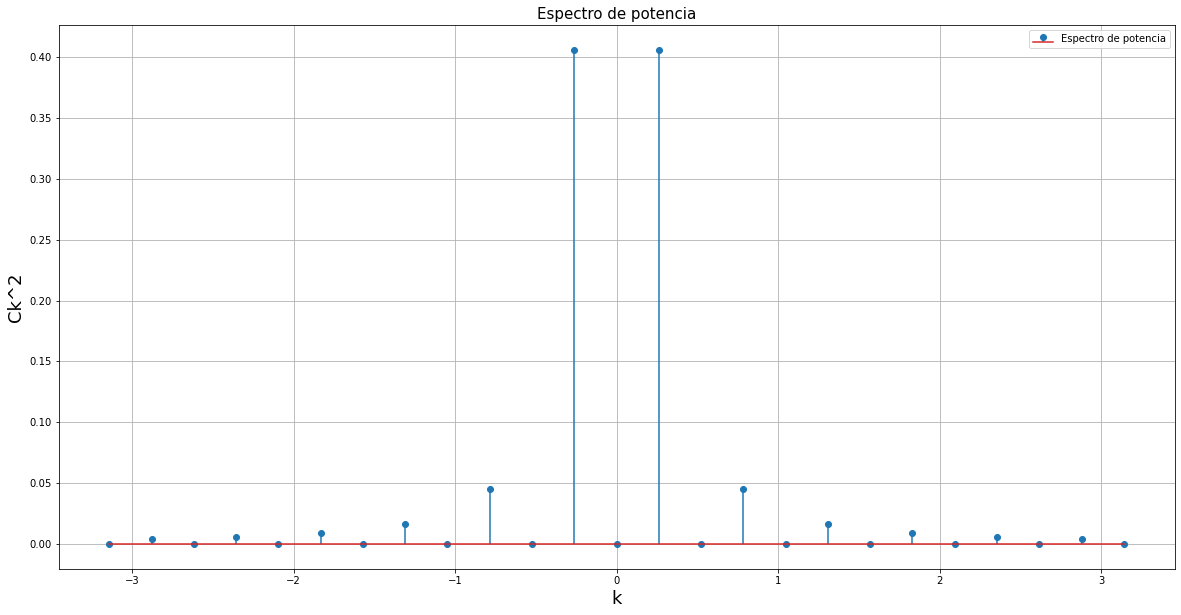

In [112]:
w=np.arange(-np.pi,np.pi,1/fs)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.plot(w,abs(Trasformada_signal)**2, label="Trasformada de furier") #señal x y  t
plt.xlabel('W',fontsize=18) #label x
plt.ylabel('Amplitud',fontsize= 18) #label y
plt.title("Trasformada de furier",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar


#Para 25
P25 = (abs(cn_25))**2
K_25 = np.linspace(-np.pi,np.pi,25)
plt.figure(figsize=(20,10)) #tamaño de la grafica
plt.stem(K_25, np.roll(P25,int(25/2)), label="Espectro de potencia") #señal x y  t
plt.xlabel('k',fontsize=18) #label x
plt.ylabel('Ck^2',fontsize= 18) #label y
plt.title("Espectro de potencia",FontSize=15) #titulo
plt.legend()
plt.grid()
plt.show() #mostrar

#el espetro esta entre -pi a pi

¿Encuentra alguna similitud? ¿a que cree que se debe esto? Explique
R: se encuentra similitud, ya que la transformada de Fourier se usa para señales no periodicas, y el pulso es una señal donde no se ve el perido, se puede usar y dara un resultado similar al tren de pulsos ya que es la misma señal pero periodica y presenta mas potencia informacion

### 6. Conclusiones
- Se establece que entre mas coeficientes de la serie de Fourier de una señal tengo yo, mas potencia o informacion tendre de la señal, por ende, es mas probable su recuperacion.

- se entiende la utilidad series de Fourier se aplican para senales periodicas y la transformada de Fourier se aplica para senales no-periodicas para el analisis de